# Today I have been looking at some basic clustering of molecules.

## Todo:
1. See if we can cluster by things other than fingerprints
2. Make the pandas data handling a bit nicer
3. Consider what the topology is actually meaning here



In [13]:
import numpy as np
import sklearn
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import rdkit.Chem.Fingerprints.ClusterMols
from IPython.display import SVG, IFrame
import gzip
import os
import pickle
import pandas as pd
import kmapper as km
from kmapper import jupyter
from sklearn import cluster

In [14]:
with open("../data/processed/curated_set_with_publication_year.pd.pkl", "rb") as infile:
    df = pickle.load(infile)

In [15]:
from collections import Counter
possible_targets = Counter([item for item in df["TGT_CHEMBL_ID"]])
print(possible_targets)
first_target = df["TGT_CHEMBL_ID"] == "CHEMBL3459"
sub_df = df[first_target]

Counter({'CHEMBL240': 4703, 'CHEMBL253': 3472, 'CHEMBL218': 2997, 'CHEMBL251': 2976, 'CHEMBL228': 2853, 'CHEMBL264': 2548, 'CHEMBL226': 2544, 'CHEMBL217': 2473, 'CHEMBL344': 2358, 'CHEMBL243': 2315, 'CHEMBL256': 2304, 'CHEMBL205': 2257, 'CHEMBL279': 2142, 'CHEMBL261': 2089, 'CHEMBL4235': 2020, 'CHEMBL244': 2010, 'CHEMBL222': 2003, 'CHEMBL233': 1998, 'CHEMBL4078': 1994, 'CHEMBL284': 1950, 'CHEMBL237': 1908, 'CHEMBL259': 1828, 'CHEMBL4822': 1799, 'CHEMBL3371': 1773, 'CHEMBL214': 1703, 'CHEMBL313': 1690, 'CHEMBL3594': 1678, 'CHEMBL203': 1659, 'CHEMBL224': 1643, 'CHEMBL4296': 1594, 'CHEMBL260': 1589, 'CHEMBL235': 1575, 'CHEMBL234': 1569, 'CHEMBL225': 1565, 'CHEMBL236': 1550, 'CHEMBL220': 1542, 'CHEMBL238': 1518, 'CHEMBL247': 1474, 'CHEMBL255': 1445, 'CHEMBL3952': 1424, 'CHEMBL2039': 1403, 'CHEMBL340': 1386, 'CHEMBL3242': 1380, 'CHEMBL204': 1347, 'CHEMBL5071': 1332, 'CHEMBL239': 1324, 'CHEMBL325': 1298, 'CHEMBL5763': 1282, 'CHEMBL2034': 1258, 'CHEMBL4015': 1234, 'CHEMBL2409': 1204, 'CHEMBL3

In [16]:
fingerprint_data = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles),3) for smiles in sub_df["SMILES"]]
try:
    sub_df.insert(0, "FINGERPRINT",fingerprint_data)
except ValueError:
    sub_df.loc["FINGERPRINT"] = fingerprint_data

In [17]:
sub_df

,FINGERPRINT,BIOACT_PCHEMBL_VALUE,CMP_ACD_LOGD,CMP_ACD_LOGP,CMP_ALOGP,CMP_AROMATIC_RINGS,CMP_CHEMBL_ID,CMP_FULL_MWT,CMP_HBA,CMP_HBD,...,CMP_STANDARD_INCHI_KEY,CMP_STRUCTURE_TYPE,CMP_TYPE_PROTEIN,CMP_TYPE_SMALL_MOLECULE,DOC_YEAR,SMILES,TC_key,TGT_CHEMBL_ID,TGT_ORGANISM,TGT_TID
CHEMBL3459 - CHEMBL27403,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",6.645,2.66,2.86,3.74,3,CHEMBL27403,334.34,3,0,...,LXFHSCDLMBZYKY-UHFFFAOYSA-N,MOL,False,True,1990,CN1CCN(c2nc3cc(C(F)(F)F)ccc3n3cccc23)CC1,CHEMBL3459 - CHEMBL27403,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL64903,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",4.710,3.50,3.57,3.90,4,CHEMBL64903,380.48,3,0,...,QUJXTOCQGXKMEK-UHFFFAOYSA-N,MOL,False,True,1996,Fc1ccc(CN2CCN(Cc3nc4ccsc4n4cccc34)CC2)cc1,CHEMBL3459 - CHEMBL64903,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL27592,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.490,0.96,3.22,2.91,2,CHEMBL27592,277.16,1,2,...,FCKKUEPMSPRIAO-UHFFFAOYSA-N,MOL,False,True,1990,Brc1ccc2[nH]cc(C3=CCNCC3)c2c1,CHEMBL3459 - CHEMBL27592,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL62902,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.720,5.63,5.63,6.66,5,CHEMBL62902,478.53,3,0,...,HEUZTEKWBIBQQP-UHFFFAOYSA-N,MOL,False,True,1996,FC(F)(F)c1cccc(N2CCN(c3nc4scc(-c5ccccc5)c4n4cc...,CHEMBL3459 - CHEMBL62902,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL62274,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",6.240,2.77,2.79,3.14,3,CHEMBL62274,298.41,3,0,...,MSVKSHZVXNPCBB-UHFFFAOYSA-N,MOL,False,True,1996,C=CCN1CCN(c2nc3ccsc3n3cccc23)CC1,CHEMBL3459 - CHEMBL62274,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL65736,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",4.990,2.69,2.77,3.34,3,CHEMBL65736,312.43,3,0,...,CYUNIDFFVZCUDT-UHFFFAOYSA-N,MOL,False,True,1996,c1cc2c(N3CCN(CC4CC4)CC3)nc3ccsc3n2c1,CHEMBL3459 - CHEMBL65736,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL292725,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",5.150,3.87,3.89,3.87,4,CHEMBL292725,392.47,5,0,...,OUZIPSMKVVNNRW-UHFFFAOYSA-N,MOL,False,True,1996,c1cc2c(N3CCN(Cc4ccc5c(c4)OCO5)CC3)nc3sccc3n2c1,CHEMBL3459 - CHEMBL292725,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL28178,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.680,1.94,3.12,3.21,3,CHEMBL28178,320.31,3,1,...,BLPNNGLJLMTUHN-UHFFFAOYSA-N,MOL,False,True,1990,FC(F)(F)c1ccc2c(c1)nc(N1CCNCC1)c1cccn12,CHEMBL3459 - CHEMBL28178,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL65974,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",4.950,1.65,1.87,2.52,3,CHEMBL65974,272.37,3,0,...,OYQJNUJWLVFCPE-UHFFFAOYSA-N,MOL,False,True,1996,CN1CCN(c2nc3ccsc3n3cccc23)CC1,CHEMBL3459 - CHEMBL65974,CHEMBL3459,Rattus norvegicus,10577
CHEMBL3459 - CHEMBL26688,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",6.040,-0.46,2.18,1.80,1,CHEMBL26688,177.24,2,1,...,RVKOHSCTEHZRRT-UHFFFAOYSA-N,MOL,False,True,1993,COc1cccc2c1CC(N)CC2,CHEMBL3459 - CHEMBL26688,CHEMBL3459,Rattus norvegicus,10577


In [18]:
fingerprint_data = []
for index, series in sub_df.iterrows():
    fingerprint_data.append((series["CMP_CHEMBL_ID"], series["FINGERPRINT"]))
len(fingerprint_data)


60

In [19]:
def GetDistanceMatrix(data,metric,isSimilarity=1):
    """
    Adapted from rdkit, because their implementation has a bug
    in it (it relies on Python 2 doing integer division by default).
    It is also poorly documented. Metric is a function
    that returns the 'distance' between points 1 and 2.
    
    Data should be a list of tuples with fingerprints in position 1
    (the rest of the elements of the tuple are not important)

    Returns the symmetric distance matrix.
    (see ML.Cluster.Resemblance for layout documentation)
    """
    nPts = len(data)
    num_pairs = int(nPts*(nPts-1)/2)
    res = np.zeros(num_pairs ,np.float)
    print(res)
    nSoFar=0
    for col in range(1,nPts):
        for row in range(col):
            fp1 = data[col][1]
            fp2 = data[row][1]
            if fp1.GetNumBits()>fp2.GetNumBits():
                fp1 = DataStructs.FoldFingerprint(fp1,fp1.GetNumBits()/fp2.GetNumBits())
            elif fp2.GetNumBits()>fp1.GetNumBits():
                fp2 = DataStructs.FoldFingerprint(fp2,fp2.GetNumBits()/fp1.GetNumBits())
            sim = metric(fp1,fp2)
            if isSimilarity:
                sim = 1.-sim
            res[nSoFar] = sim
            nSoFar += 1
    return res   

In [20]:
distance_matrix = GetDistanceMatrix(fingerprint_data, metric=rdkit.DataStructs.TanimotoSimilarity)
distance_matrix

[0. 0. 0. ... 0. 0. 0.]


array([0.79411765, 0.95049505, 0.96330275, ..., 0.94166667, 0.94214876,
       0.92857143])

Now we need to mangle this flat distance matrix into a sane square one.
The indices of $(\text{row}, \text{col})$ are at $\frac{(\text{col}\times(\text{col}-1))}{2} + \text{row} $
in the flat matrix.

In [21]:
sq_distance_matrix = np.empty([len(fingerprint_data), len(fingerprint_data)])
for row in range(len(fingerprint_data)):
    for col in range(row + 1):
        index = int((col * (col - 1)) / 2) + row
        if row == col:
            sq_distance_matrix[row, col] = 0.0
        else:
            sq_distance_matrix[row, col] = distance_matrix[index]
            sq_distance_matrix[col, row] = distance_matrix[index]

In [28]:
numerical_cols = [sub_df.columns[pos] for pos, item in enumerate(sub_df.dtypes) if item in [np.float64, np.int64]]
new_data = sub_df[numerical_cols].to_numpy()
dimensional_data = np.array([row[0] for row in new_data])
print(dimensional_data)
mapper = km.KeplerMapper(verbose=1)
graph = mapper.map(dimensional_data, X=sq_distance_matrix, precomputed=True, cover=km.Cover(n_cubes=10, perc_overlap=0.4), clusterer=sklearn.cluster.DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='precomputed', min_samples=3))

[6.645 4.71  8.49  4.72  6.24  4.99  5.15  7.68  4.95  6.04  5.13  6.24
 8.46  5.54  4.2   6.78  6.93  9.1   4.04  5.4   6.17  5.96  8.48  4.73
 6.43  4.39  5.33  5.51  4.15  5.37  4.83  7.12  7.82  6.05  5.785 8.34
 8.46  8.92  4.62  4.47  7.48  7.57  6.63  5.99  5.2   7.64  6.38  4.84
 7.86  8.72  6.19  6.97  8.49  7.92  7.54  6.24  6.7   7.12  6.85  5.63 ]
KeplerMapper(verbose=1)
Mapping on data shaped (60, 60) using lens shaped (60,)

Creating 10 hypercubes.

Created 4 edges and 8 nodes in 0:00:00.020642.


In [29]:
# Visualize it
mapper.visualize(graph, path_html="map-dataframe-test.html",
                 title="Map Dataframe Test", color_function=dimensional_data)
IFrame("map-dataframe-test.html", 800, 600)

Wrote visualization to: map-dataframe-test.html


How do we actually extract meaningful data from this list? Time to visualise it!

In [30]:
mols = [Chem.MolFromSmiles(sub_df.iloc[i]["SMILES"]) for i in graph["nodes"]["cube2_cluster0"]]
from rdkit.Chem import rdFMCS
res =rdFMCS.FindMCS(mols)
newmol = Chem.MolFromSmarts(res.smartsString)

In [31]:
def draw_molecule(molec, molsize, highlight_atoms=None):
    rdDepictor.Compute2DCoords(molec)
    drawer = rdMolDraw2D.MolDraw2DSVG(molsize[0], molsize[1], highlight_atoms=highlight_atoms)
    drawer.DrawMolecule(molec)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace("svg:", "")))

cube1_cluster0 4.934


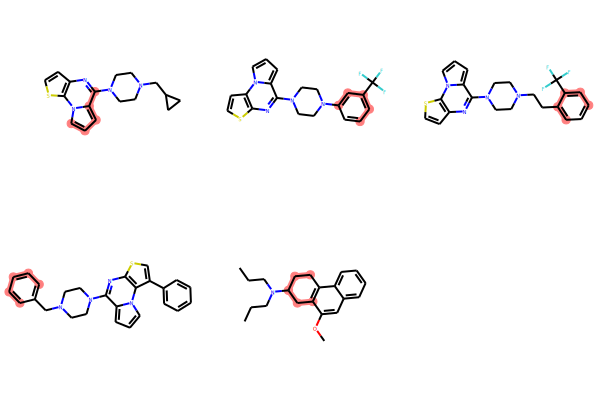

cube1_cluster1 4.6025


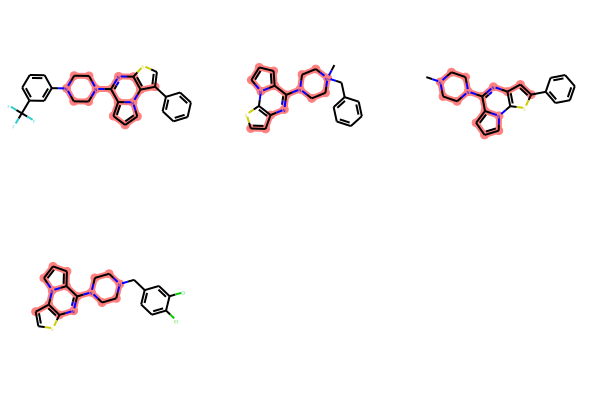

cube2_cluster0 5.456


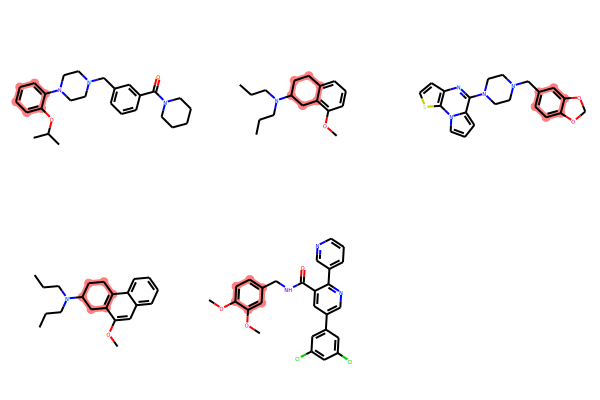

cube3_cluster0 5.776875


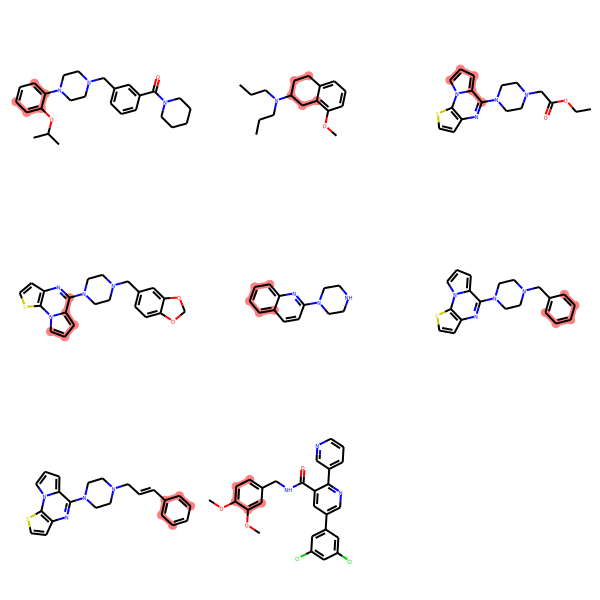

cube4_cluster0 6.218333333333334


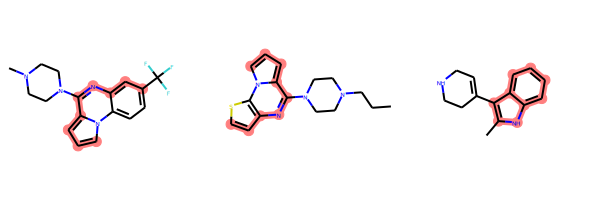

cube4_cluster1 6.196666666666666


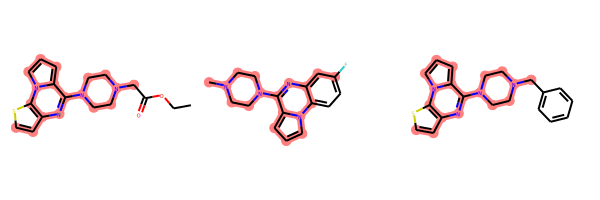

cube4_cluster2 6.336


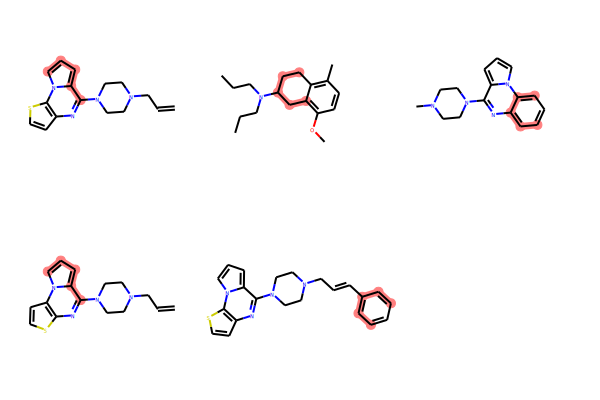

cube8_cluster0 8.366666666666667


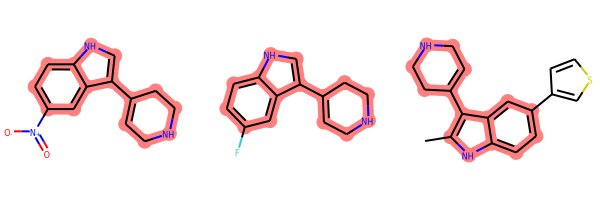

In [33]:
for index, node in enumerate(graph["nodes"]):
    mols = [Chem.MolFromSmiles(sub_df.iloc[i]["SMILES"]) for i in graph["nodes"][node]]
    mean_bioactivity = np.mean([sub_df.iloc[i]["BIOACT_PCHEMBL_VALUE"] for i in graph["nodes"][node]])
    if len(mols) > 1:
        max_substructure = rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString
        mol_smarts = Chem.MolFromSmarts(max_substructure)
        highlight_list = [mol.GetSubstructMatches(mol_smarts)[0] for mol in mols]
        print(node, mean_bioactivity)
        display(SVG(Chem.Draw._MolsToGridSVG(mols, highlightAtomLists=highlight_list)))

In [34]:
print(graph)

{'nodes': defaultdict(<class 'list'>, {'cube1_cluster0': [5, 10, 23, 38, 44], 'cube1_cluster1': [3, 25, 30, 39], 'cube2_cluster0': [13, 19, 27, 44, 59], 'cube3_cluster0': [13, 19, 20, 27, 34, 43, 50, 59], 'cube4_cluster0': [0, 21, 33], 'cube4_cluster1': [20, 24, 43], 'cube4_cluster2': [4, 11, 42, 46, 50], 'cube8_cluster0': [36, 49, 53]}), 'links': defaultdict(<class 'list'>, {'cube1_cluster0': ['cube2_cluster0'], 'cube2_cluster0': ['cube3_cluster0'], 'cube3_cluster0': ['cube4_cluster1', 'cube4_cluster2']}), 'simplices': [['cube1_cluster0'], ['cube1_cluster1'], ['cube2_cluster0'], ['cube3_cluster0'], ['cube4_cluster0'], ['cube4_cluster1'], ['cube4_cluster2'], ['cube8_cluster0'], ['cube1_cluster0', 'cube2_cluster0'], ['cube2_cluster0', 'cube3_cluster0'], ['cube3_cluster0', 'cube4_cluster1'], ['cube3_cluster0', 'cube4_cluster2']], 'meta_data': {'projection': 'custom', 'n_cubes': 10, 'perc_overlap': 0.4, 'clusterer': "DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='precomputed',<br